## MSCA 31013: Big Data Platforms
### Assignment 5
### 2/15/2021

In [1]:
print(sc.version)

2.4.0-cdh6.3.0


In [2]:
import os
from pyspark.sql.functions import *
from pyspark.sql.types import *

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
!ls -l "/project2/msca/kadochnikov/data/air_travel"

total 1359712
-rwxr-xr-x 1 kadochnikov kadochnikov 702878193 Nov  4  2016 2007.csv
-rwxr-xr-x 1 kadochnikov kadochnikov 689413344 Nov  4  2016 2008.csv


In [3]:
path = "file:///project2/msca/kadochnikov/data/air_travel/"

**Read in both CSV files as Spark dataframes**

In [4]:
spark.conf.set("spark.sql.repl.eagerEval.enabled", True)

In [5]:
flights_2007 = spark.read.format('com.databricks.spark.csv').\
options(header='true', inferschema='true', delimiter=',', quote='"').\
load(path + '2007.csv')

In [7]:
flights_2008 = spark.read.format('com.databricks.spark.csv').\
options(header='true', inferschema='true', delimiter=',', quote='"').\
load(path + '2008.csv')

In [9]:
type(flights_2007)

pyspark.sql.dataframe.DataFrame

In [10]:
type(flights_2008)

pyspark.sql.dataframe.DataFrame

**Inspect dataframes**

In [11]:
flights_2007.count()

7453215

In [12]:
flights_2008.count()

7009728

In [13]:
flights_2007.printSchema()

root
 |-- Year: integer (nullable = true)
 |-- Month: integer (nullable = true)
 |-- DayofMonth: integer (nullable = true)
 |-- DayOfWeek: integer (nullable = true)
 |-- DepTime: string (nullable = true)
 |-- CRSDepTime: integer (nullable = true)
 |-- ArrTime: string (nullable = true)
 |-- CRSArrTime: integer (nullable = true)
 |-- UniqueCarrier: string (nullable = true)
 |-- FlightNum: integer (nullable = true)
 |-- TailNum: string (nullable = true)
 |-- ActualElapsedTime: string (nullable = true)
 |-- CRSElapsedTime: string (nullable = true)
 |-- AirTime: string (nullable = true)
 |-- ArrDelay: string (nullable = true)
 |-- DepDelay: string (nullable = true)
 |-- Origin: string (nullable = true)
 |-- Dest: string (nullable = true)
 |-- Distance: integer (nullable = true)
 |-- TaxiIn: integer (nullable = true)
 |-- TaxiOut: integer (nullable = true)
 |-- Cancelled: integer (nullable = true)
 |-- CancellationCode: string (nullable = true)
 |-- Diverted: integer (nullable = true)
 |-- C

Inspect first 5 rows of each dataframe.

In [14]:
flights_2007.limit(5)

Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
2007,11,3,6,1514,1518,1626,1629,DL,1806,N902DA,132,131,110,-3,-4,SLC,SEA,689,7,15,0,null,0,0,0,0,0,0
2007,11,3,6,738,740,1034,1043,DL,1807,N968DL,176,183,149,-9,-2,LGA,TPA,1011,5,22,0,null,0,0,0,0,0,0
2007,11,3,6,653,700,933,952,DL,1808,N399DA,340,352,319,-19,-7,FLL,LAX,2342,10,11,0,null,0,0,0,0,0,0
2007,11,3,6,747,751,922,932,DL,1809,N948DL,95,101,74,-10,-4,ATL,RSW,515,5,16,0,null,0,0,0,0,0,0
2007,11,3,6,1752,1800,2045,2049,DL,1810,N615DL,113,109,82,-4,-8,LAX,SLC,590,7,24,0,null,0,0,0,0,0,0


In [15]:
flights_2008.limit(5)

Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
2008,1,3,4,2003,1955,2211,2225,WN,335,N712SW,128,150,116,-14,8,IAD,TPA,810,4,8,0,null,0,NA,NA,NA,NA,NA
2008,1,3,4,754,735,1002,1000,WN,3231,N772SW,128,145,113,2,19,IAD,TPA,810,5,10,0,null,0,NA,NA,NA,NA,NA
2008,1,3,4,628,620,804,750,WN,448,N428WN,96,90,76,14,8,IND,BWI,515,3,17,0,null,0,NA,NA,NA,NA,NA
2008,1,3,4,926,930,1054,1100,WN,1746,N612SW,88,90,78,-6,-4,IND,BWI,515,3,7,0,null,0,NA,NA,NA,NA,NA
2008,1,3,4,1829,1755,1959,1925,WN,3920,N464WN,90,90,77,34,34,IND,BWI,515,3,10,0,null,0,2,0,0,0,32


Cast ArrDelay and DepDelay columns as integers (from strings).

In [8]:
flights_2007 = flights_2007.withColumn('ArrDelay', flights_2007['ArrDelay'].cast(IntegerType()))\
.withColumn('DepDelay', flights_2007['DepDelay'].cast(IntegerType()))

flights_2008 = flights_2008.withColumn('ArrDelay', flights_2008['ArrDelay'].cast(IntegerType()))\
.withColumn('DepDelay', flights_2008['DepDelay'].cast(IntegerType()))

Concatenate both dataframes into a single one.

In [9]:
flights = flights_2007.union(flights_2008)

In [9]:
flights.count()

14462943

### Question 1

Assume "worst delays" as referenced in the assignment description means single flights with longest arrival and departure delays, for each year.

In [19]:
flights_filt = flights.select('Year', 'Origin', 'Dest', 'ArrDelay', 'DepDelay')
flights_filt.limit(5)

Year,Origin,Dest,ArrDelay,DepDelay
2007,OMA,ORD,-12,-6
2007,OMA,ORD,-7,-4
2007,OMA,ORD,-4,-6
2007,OMA,ORD,7,-2
2007,OMA,ORD,-6,-4


In [20]:
flights_filt.groupby('Year').max('ArrDelay', 'DepDelay')

Year,max(ArrDelay),max(DepDelay)
2007,2598,2601
2008,2461,2467


If we want to see the origin and destination airports for flights with longest delays (for each year), this groupby won't get us what we need because once we group by year alone, we cannot view individual flights' airports. However, if we group by origin and destination airports as well, and then sort the results in descending order, we should be able to determine which pair of airports had the flight with longest delay.

In [21]:
longest_arrival_delay = flights_filt.groupby('Year', 'Origin', 'Dest').max('ArrDelay', 'DepDelay').orderBy('max(ArrDelay)', ascending=False).limit(2)
longest_arrival_delay

Year,Origin,Dest,max(ArrDelay),max(DepDelay)
2007,PBI,DTW,2598,2601
2008,HNL,MSP,2461,2457


In [22]:
longest_departure_delay = flights_filt.groupby('Year', 'Origin', 'Dest').max('ArrDelay', 'DepDelay').orderBy('max(DepDelay)', ascending=False).limit(2)
longest_departure_delay

Year,Origin,Dest,max(ArrDelay),max(DepDelay)
2007,PBI,DTW,2598,2601
2008,CLT,MSP,2453,2467


### Question 2

To assess which locations had fewest delays, we can filter the full dataframe for records that have a positive value in ArrDelay or DepDelay, group by origin and destination airports, and the count records.

First, let's confirm there are flights in the dataset that arrived or departed on time.

In [23]:
flights.filter((flights.ArrDelay == 0) | (flights.DepDelay == 0)).count()

1490759

In [24]:
delayed_flights = flights_filt.filter((flights.ArrDelay > 0) | (flights.DepDelay > 0))
delayed_flights.limit(5)

Year,Origin,Dest,ArrDelay,DepDelay
2007,LGA,CAK,66,63
2007,LGA,CAK,54,42
2007,LGA,PHF,1,-2
2007,LGA,PHF,39,42
2007,MCO,ATL,13,-5


In [25]:
delayed_flights.groupby('Year', 'Origin', 'Dest').\
agg(count('*').alias('num_delayed_flights')).\
orderBy('num_delayed_flights').\
limit(10)

Year,Origin,Dest,num_delayed_flights
2007,MDW,LGA,1
2008,BZN,BTM,1
2007,AUS,BTR,1
2008,ABE,PHL,1
2007,CLD,SNA,1
2008,RIC,JAX,1
2008,SDF,SPI,1
2007,RAP,TWF,1
2007,RDU,GRB,1
2008,MDT,AVP,1


Not very interesting. What if we narrowed down the definition of delay? We can add a column called "TotalDelay" that is the sum of arrival delay minutes and departure delay minutes, and work with a set of flights that have a total delay of 15 minutes or more.

In [26]:
flights_w_total_delay = flights_filt.\
withColumn('TotalDelay', flights_filt.ArrDelay + flights_filt.DepDelay)

flights_w_total_delay.limit(5)

Year,Origin,Dest,ArrDelay,DepDelay,TotalDelay
2007,IAD,DEN,-15,2,-13
2007,IAD,DEN,5,17,22
2007,IAD,DEN,14,19,33
2007,HNL,LAX,-4,-3,-7
2007,HNL,LAX,-34,-7,-41


In [27]:
delayed_flights = flights_w_total_delay.filter((flights_w_total_delay.TotalDelay > 15))
delayed_flights.limit(5)

Year,Origin,Dest,ArrDelay,DepDelay,TotalDelay
2007,EWR,ALB,39,7,46
2007,DAL,IAH,112,39,151
2007,IAH,LCH,59,72,131
2007,IAH,CHS,75,80,155
2007,IAH,CLT,70,61,131


In [28]:
delayed_flights.groupby('Year', 'Origin', 'Dest').\
agg(count('*').alias('num_delayed_flights')).\
orderBy('num_delayed_flights').\
limit(10)

Year,Origin,Dest,num_delayed_flights
2007,GSO,BTR,1
2007,MKC,MKE,1
2007,ATL,OGG,1
2008,SGF,BNA,1
2007,AVP,LGA,1
2008,MFR,MOD,1
2008,DSM,CWA,1
2008,GSO,JAX,1
2008,OKC,CLE,1
2008,SMF,SBA,1


We can see that re-defining delays doesn't really change our results. There are apparently quite a few airport pairs that only had one delayed flight. We could further explore by the perhaps restricting our search only to origin/destination pairs that had greater than 10,000 flights or something like that, but save that for later.

### Question 3

In [29]:
flights.limit(5)

Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
2007,4,4,3,1832,1826,2130,2136,UA,195,N423UA,358,370,335,-6,6,PHL,LAX,2401,12,11,0,null,0,0,0,0,0,0
2007,4,5,4,1842,1826,2156,2136,UA,195,N436UA,374,370,322,20,16,PHL,LAX,2401,8,44,0,null,0,0,0,4,0,16
2007,4,6,5,1824,1826,2106,2136,UA,195,N854UA,342,370,313,-30,-2,PHL,LAX,2401,2,27,0,null,0,0,0,0,0,0
2007,4,7,6,1842,1826,2141,2136,UA,195,N428UA,359,370,319,5,16,PHL,LAX,2401,12,28,0,null,0,0,0,0,0,0
2007,4,8,7,1829,1826,2127,2136,UA,195,N428UA,358,370,331,-9,3,PHL,LAX,2401,3,24,0,null,0,0,0,0,0,0


In [30]:
monthly_avg_delays = flights.select('Year', 'Month', 'DepDelay', 'ArrDelay').\
withColumn('TotalDelay', flights.ArrDelay + flights.DepDelay).\
groupby('Year', 'Month').mean('DepDelay', 'ArrDelay', 'TotalDelay').\
orderBy('Year', 'Month')

monthly_avg_delays.limit(5)

Year,Month,avg(DepDelay),avg(ArrDelay),avg(TotalDelay)
2007,1,10.286743415948312,9.162151701506165,19.41513806233067
2007,2,14.02253123732965,13.51979483296776,27.502412419879825
2007,3,11.836802542694253,10.084908470559062,21.876819679997165
2007,4,10.07771370814071,8.516229825822615,18.57454961423968
2007,5,8.329205401044868,7.037888681043307,15.34384575647414


Round the values in the average columns for readability.

In [31]:
monthly_avg_delays = monthly_avg_delays.\
withColumn("avg(DepDelay)", round(monthly_avg_delays["avg(DepDelay)"], 2)).\
withColumn("avg(ArrDelay)", round(monthly_avg_delays["avg(ArrDelay)"], 2)).\
withColumn("avg(TotalDelay)", round(monthly_avg_delays["avg(TotalDelay)"], 2))

Convert the PySpark dataframe to a  Pandas dataframe object for plotting.

In [32]:
monthly_avg_delays = monthly_avg_delays.toPandas()

Add a column that casts the Year and Month columns to strings and concatenates them.

In [33]:
monthly_avg_delays['date_str'] = (
    monthly_avg_delays['Year'].astype(str) + '-' + monthly_avg_delays['Month'].astype(str)
)

In [34]:
monthly_avg_delays.head()

,Year,Month,avg(DepDelay),avg(ArrDelay),avg(TotalDelay),date_str
0,2007,1,10.29,9.16,19.42,2007-1
1,2007,2,14.02,13.52,27.50,2007-2
2,2007,3,11.84,10.08,21.88,2007-3
3,2007,4,10.08,8.52,18.57,2007-4
4,2007,5,8.33,7.04,15.34,2007-5


Create a line plot, with two lines: one for the monthly average departure delay and another for the monthly average arrival delay across the two year period (2007 - 2008).

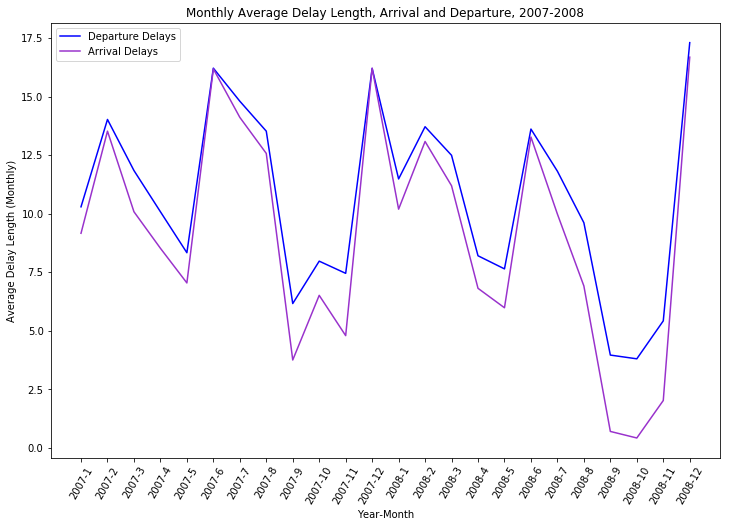

In [35]:
plt.figure(figsize=(12,8))
plt.title("Monthly Average Delay Length, Arrival and Departure, 2007-2008")
plt.xlabel("Year-Month")
plt.ylabel("Average Delay Length (Monthly)")
plt.xticks(rotation=60)

plt.plot(monthly_avg_delays['date_str'],
         monthly_avg_delays['avg(DepDelay)'],
         label='Departure Delays',
         color='blue')

plt.plot(monthly_avg_delays['date_str'],
         monthly_avg_delays['avg(ArrDelay)'],
         label='Arrival Delays',
         color='darkorchid')

plt.legend()
plt.show()

Both departure and arrival delays were highest, in terms of monthly average delay length, in summer (June, July, August) and December. Delays were lowest in both years in the fall months (September, October, and November). Throughout the two year period, departure delays were higher than arrival delays -- this difference was most pronounced during the fall months of both years.

### Question 4

To assess any day-of-week seasonal pattern, we can group the records by the DayofWeek column, and compute average length for both departure  and arrival delays. The first record in the dataset is for January 1, 2007 -- the DayofWeek value for this date is 1, which means 1 represents Monday and 7 represents Sunday.

In [36]:
daily_avg_delays = flights.select('Year', 'DayofWeek', 'DepDelay', 'ArrDelay').\
withColumn('TotalDelay', flights.ArrDelay + flights.DepDelay).\
groupby('Year', 'DayofWeek').mean('DepDelay', 'ArrDelay', 'TotalDelay').\
orderBy('Year', 'DayofWeek')

daily_avg_delays.cache()
daily_avg_delays.limit(5)

Year,DayofWeek,avg(DepDelay),avg(ArrDelay),avg(TotalDelay)
2007,5,13.576724963618544,13.067675000697863,26.603897795684418
2007,1,11.892415704828622,10.513502556550229,22.37938617054332
2008,6,8.645680904903614,5.789666410427927,14.39493835418689
2008,5,12.158036387869656,10.953440079613667,23.054549040909055
2007,6,8.993704679140304,5.846600031017031,14.8118871679048


Round the values in the average columns for readability.

In [37]:
daily_avg_delays = daily_avg_delays.\
withColumn("avg(DepDelay)", round(daily_avg_delays["avg(DepDelay)"], 2)).\
withColumn("avg(ArrDelay)", round(daily_avg_delays["avg(ArrDelay)"], 2)).\
withColumn("avg(TotalDelay)", round(daily_avg_delays["avg(TotalDelay)"], 2))

In [38]:
daily_avg_delays_pd = daily_avg_delays.toPandas()
daily_avg_delays_pd

,Year,DayofWeek,avg(DepDelay),avg(ArrDelay),avg(TotalDelay)
0,2007,1,11.89,10.51,22.38
1,2007,2,9.40,8.26,17.62
2,2007,3,10.69,9.96,20.60
3,2007,4,12.89,12.69,25.53
4,2007,5,13.58,13.07,26.60
5,2007,6,8.99,5.85,14.81
6,2007,7,11.98,10.33,22.28
7,2008,1,10.27,8.21,18.43
8,2008,2,8.98,7.48,16.40
9,2008,3,8.29,6.52,14.76


In [39]:
daily_avg_delays.unpersist();

**Mean departure delays by day of week and year.**

In [40]:
import seaborn as sns

plt.figure(figsize=(12,8))
plt.title("Average Departure Delay Length by Day of Week, 2007-2008", fontsize=16)


sns.barplot(x="DayofWeek",
            y="avg(DepDelay)",
            hue="Year",
            data=daily_avg_delays_pd)

plt.xlabel("Day of Week", fontsize=14)
plt.ylabel("Average Departure Delay Length (Minutes)", fontsize=14)

There doesn't appear to be any significant increase or delay in mean departure delay time. For each year, Friday (labeled as 5) has the highest mean departure delay length. However, Saturday is among the lowest in both years. Sunday is also high, but comparable to Monday.

**Mean arrival delays by day of week and year.**

Text(0,0.5,'Average Arrival Delay Length (Minutes)')

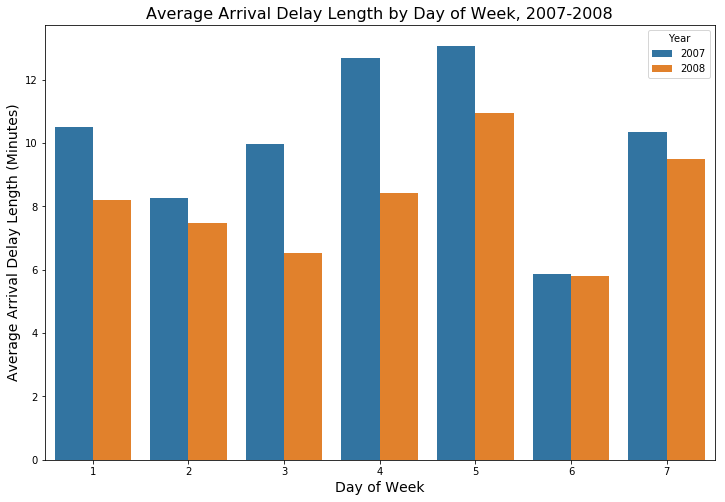

In [43]:
plt.figure(figsize=(12,8))
plt.title("Average Arrival Delay Length by Day of Week, 2007-2008", fontsize=16)


sns.barplot(x="DayofWeek",
            y="avg(ArrDelay)",
            hue="Year",
            data=daily_avg_delays_pd,
            palette="Blues")

plt.xlabel("Day of Week", fontsize=14)
plt.ylabel("Average Arrival Delay Length (Minutes)", fontsize=14)

In 2007, mean arrival delay length was highest on Thursdays and Fridays. Saturdays had the lowest mean arrival delays. Sunday was fairly high but comparable to Monday, and Wednesday.
<br>
The same is true for 2008, but the mean values are lower for most days of the week (mean arrival delay length on Saturday is very similar in both 2007 and 2008).

### Question 5

To examine the distribution of flights throughout the day, we can create bins for both arrival and departure times, representing the hour of the day, and produce a count of flights per bin.

In [10]:
flights_by_time = flights.select('Year', 'DepTime', 'ArrTime', 'ActualElapsedTime').\
withColumn('DepTime', flights['DepTime'].cast(IntegerType())).\
withColumn('ArrTime', flights['ArrTime'].cast(IntegerType())).\
withColumn('ActualElapsedTime', flights['ActualElapsedTime'].cast(IntegerType()))

flights_by_time.limit(5)

Year,DepTime,ArrTime,ActualElapsedTime
2007,911,1126,135
2007,2025,2250,145
2007,634,852,138
2007,1535,1824,169
2007,2147,6,139


First, check if there are null values in ArrTime and/or DepTime.

In [23]:
flights_by_time.filter((flights_by_time.DepTime.isNull()) | flights_by_time.ArrTime.isNull()).count()

329576

There are. Filter them out.

In [25]:
flights_by_time = flights_by_time.filter((flights_by_time.DepTime.isNotNull()) & 
                                         (flights_by_time.ArrTime.isNotNull()))

In [26]:
flights_by_time.count()

14133367

In [27]:
from pyspark.ml.feature import Bucketizer

splits = [float(x) for x in range(0, 2500, 100)]

dep_bucketizer = Bucketizer(splits=splits, inputCol="DepTime", outputCol="dep_bucket")

flights_bucketed_dep = dep_bucketizer.transform(flights_by_time)
print("Bucketizer output with %d buckets" % (len(dep_bucketizer.getSplits()) - 1))

Bucketizer output with 24 buckets


In [29]:
arr_bucketizer = Bucketizer(splits=splits, inputCol="ArrTime", outputCol="arr_bucket")
flights_bucketed_by_hour = arr_bucketizer.transform(flights_bucketed_dep).cache()

In [56]:
flights_bucketed_by_hour.unpersist();

In [30]:
flights_bucketed_by_hour.count()

14133367

In [55]:
flights_bucketed_by_hour.limit(5)

Year,DepTime,ArrTime,ActualElapsedTime,dep_bucket,arr_bucket
2007,806,918,72,8.0,9.0
2007,2155,2306,71,21.0,23.0
2007,1249,1820,211,12.0,18.0
2007,1414,1539,85,14.0,15.0
2007,1845,2001,76,18.0,20.0


In [33]:
flights_by_arrival_hour = flights_bucketed_by_hour.groupby('Year', 'arr_bucket').agg(count('*').alias('num_flights'))
flights_by_arrival_hour.orderBy('Year', 'arr_bucket').limit(12)

Year,arr_bucket,num_flights
2007,0.0,98305
2007,1.0,34204
2007,2.0,11103
2007,3.0,4385
2007,4.0,9126
2007,5.0,36361
2007,6.0,78468
2007,7.0,252334
2007,8.0,360869
2007,9.0,417427


In [35]:
flights_by_departure_hour = flights_bucketed_by_hour.groupby('Year', 'dep_bucket').agg(count('*').alias('num_flights'))
flights_by_departure_hour.orderBy('Year', 'dep_bucket').limit(12)

Year,dep_bucket,num_flights
2007,0.0,24970
2007,1.0,6763
2007,2.0,2292
2007,3.0,691
2007,4.0,3272
2007,5.0,133365
2007,6.0,471924
2007,7.0,463778
2007,8.0,476422
2007,9.0,458423


In [36]:
flights_by_arrival_hour_pd = flights_by_arrival_hour.toPandas()
flights_by_departure_hour_pd = flights_by_departure_hour.toPandas()

In [38]:
flights_by_arrival_hour_pd.shape

(48, 3)

**Plot barchart of flight arrivals by hour of the day.**

Text(0,0.5,'Number of Arrivals')

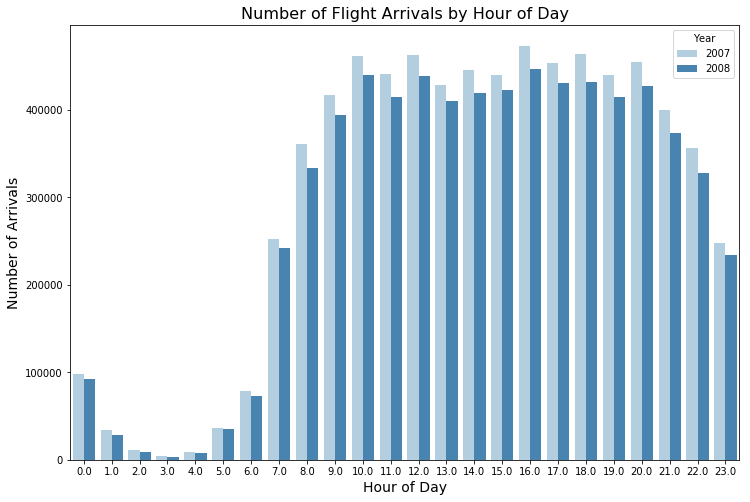

In [42]:
plt.figure(figsize=(12,8))
plt.title("Number of Flight Arrivals by Hour of Day", fontsize=16)


sns.barplot(x="arr_bucket",
            y="num_flights",
            hue="Year",
            data=flights_by_arrival_hour_pd,
            palette="Blues")

plt.xlabel("Hour of Day", fontsize=14)
plt.ylabel("Number of Arrivals", fontsize=14)

Arrivals begin to pick up in the early morning, between 5 and 7 AM. This gradually increases until 10AM. From here, there are consistently over 400,000 arrivals until 9 PM, at which point there is a gradual decline in arrivals until the hour between midnight and 2AM. There are relatively few flights arriving between 2AM and 5AM. There appear to be more flights in this dataset from 2007 than from 2008.

**Plot barchart of flight departures by hour of the day.**

Text(0,0.5,'Number of Departures')

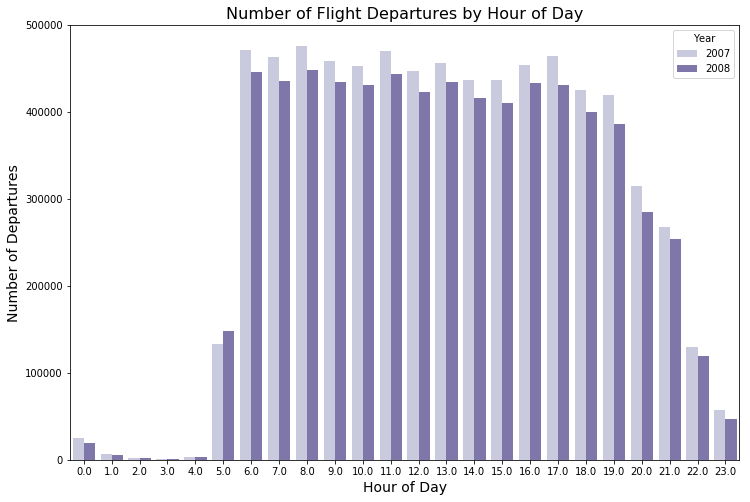

In [43]:
plt.figure(figsize=(12,8))
plt.title("Number of Flight Departures by Hour of Day", fontsize=16)


sns.barplot(x="dep_bucket",
            y="num_flights",
            hue="Year",
            data=flights_by_departure_hour_pd,
            palette="Purples")

plt.xlabel("Hour of Day", fontsize=14)
plt.ylabel("Number of Departures", fontsize=14)

There is a sharp increase in the number of departures beginning at 6AM. This continues, with departing flights approaching 500,000 for most of the day, until 7PM (there is a slight decrease beginning at 5PM. Departures steadily decline from 8PM to 1AM and reduce from approximately 300,000 at 8PM down to about 10,000 by 1AM. Unsurprisingly, there are very few flights leaving between 2AM and 5AM.

### Question 6

To assess delays throughout the day, we can take a similar approach. We can bucket flights by hour of the day (after removing flights without ArrTime and DepTime values), and compute the mean arrival and departure delay lengths.

In [10]:
flights_by_time = flights\
.select('Year', 'DepTime', 'DepDelay', 'ArrTime', 'ArrDelay')\
.withColumn('DepTime', flights['DepTime'].cast(IntegerType()))\
.withColumn('ArrTime', flights['ArrTime'].cast(IntegerType()))\

In [11]:
flights_by_time = flights_by_time.filter((flights_by_time.DepTime.isNotNull()) & 
                                         (flights_by_time.ArrTime.isNotNull()))

In [12]:
flights_by_time.count()

14133367

In [13]:
flights_by_time.limit(5)

Year,DepTime,DepDelay,ArrTime,ArrDelay
2007,1427,-3,1608,1
2007,1428,-2,1558,-9
2007,1428,-2,1554,-13
2007,1426,-4,1554,-13
2007,1521,51,1649,42


In [15]:
from pyspark.ml.feature import Bucketizer
splits = [float(x) for x in range(0, 2500, 100)]

dep_bucketizer = Bucketizer(splits=splits, inputCol="DepTime", outputCol="dep_bucket")

flights_bucketed_dep = dep_bucketizer.transform(flights_by_time)
print("Bucketizer output with %d buckets" % (len(dep_bucketizer.getSplits()) - 1))

Bucketizer output with 24 buckets


In [16]:
arr_bucketizer = Bucketizer(splits=splits, inputCol="ArrTime", outputCol="arr_bucket")
flights_bucketed_by_hour = arr_bucketizer.transform(flights_bucketed_dep).cache()

In [17]:
flights_bucketed_by_hour.limit(5)

Year,DepTime,DepDelay,ArrTime,ArrDelay,dep_bucket,arr_bucket
2007,1308,113,1558,113,13.0,15.0
2007,1113,-2,1357,-8,11.0,13.0
2007,1110,-5,1351,-14,11.0,13.0
2007,1106,-9,1407,2,11.0,14.0
2007,1115,0,1412,7,11.0,14.0


In [18]:
mean_delays_by_arrival_hour = flights_bucketed_by_hour\
.groupby('Year', 'arr_bucket')\
.agg(mean('ArrDelay').alias('avg_arrival_delay'),
     mean('DepDelay').alias('avg_departure_delay'))

mean_delays_by_arrival_hour = mean_delays_by_arrival_hour\
.withColumn("avg_arrival_delay", round(mean_delays_by_arrival_hour["avg_arrival_delay"], 2))\
.withColumn("avg_departure_delay", round(mean_delays_by_arrival_hour["avg_departure_delay"], 2))

mean_delays_by_arrival_hour.orderBy('Year', 'arr_bucket').limit(12)

Year,arr_bucket,avg_arrival_delay,avg_departure_delay
2007,0.0,56.3,55.08
2007,1.0,98.17,95.71
2007,2.0,140.47,137.67
2007,3.0,144.9,144.23
2007,4.0,19.06,26.55
2007,5.0,-2.15,2.33
2007,6.0,-1.33,1.06
2007,7.0,-3.78,-1.02
2007,8.0,-1.22,0.16
2007,9.0,0.09,1.46


In [19]:
mean_delays_by_departure_hour = flights_bucketed_by_hour\
.groupby('Year', 'dep_bucket')\
.agg(mean('ArrDelay').alias('avg_arrival_delay'),
     mean('DepDelay').alias('avg_departure_delay'))

mean_delays_by_departure_hour = mean_delays_by_departure_hour\
.withColumn("avg_arrival_delay", round(mean_delays_by_departure_hour["avg_arrival_delay"], 2))\
.withColumn("avg_departure_delay", round(mean_delays_by_departure_hour["avg_departure_delay"], 2))

mean_delays_by_departure_hour.orderBy('Year', 'dep_bucket').limit(12)

Year,dep_bucket,avg_arrival_delay,avg_departure_delay
2007,0.0,60.5,64.09
2007,1.0,98.9,104.32
2007,2.0,119.47,125.7
2007,3.0,139.67,146.12
2007,4.0,7.51,6.9
2007,5.0,-4.99,-3.89
2007,6.0,-1.99,-1.1
2007,7.0,-0.03,1.06
2007,8.0,1.69,2.69
2007,9.0,3.51,4.88


In [20]:
mean_delays_by_arrival_hour_pd = mean_delays_by_arrival_hour.orderBy('Year', 'arr_bucket').toPandas()
mean_delays_by_departure_hour_pd = mean_delays_by_departure_hour.orderBy('Year', 'dep_bucket').toPandas()

In [21]:
mean_delays_by_arrival_hour_pd.head()

,Year,arr_bucket,avg_arrival_delay,avg_departure_delay
0,2007,0.0,56.30,55.08
1,2007,1.0,98.17,95.71
2,2007,2.0,140.47,137.67
3,2007,3.0,144.90,144.23
4,2007,4.0,19.06,26.55


In [22]:
mean_delays_by_departure_hour_pd.head()

,Year,dep_bucket,avg_arrival_delay,avg_departure_delay
0,2007,0.0,60.50,64.09
1,2007,1.0,98.90,104.32
2,2007,2.0,119.47,125.70
3,2007,3.0,139.67,146.12
4,2007,4.0,7.51,6.90


In [85]:
mean_delays_by_arrival_hour_pd['Year'].value_counts()

2008    24
2007    24
Name: Year, dtype: int64

**Plot mean delays by arrival hour of day.**

Text(0,0.5,'Mean Delay Length (Minutes)')

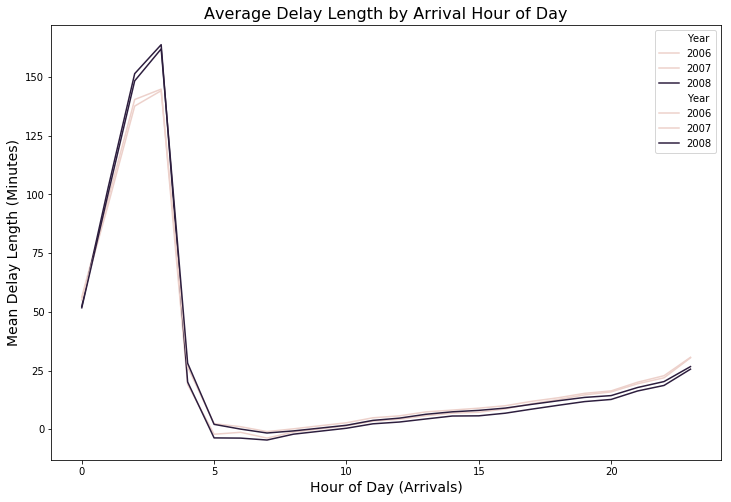

In [29]:
plt.figure(figsize=(12,8))
plt.title("Average Delay Length by Arrival Hour of Day", fontsize=16)


sns.lineplot(x="arr_bucket",
            y="avg_arrival_delay",
            hue="Year",
            data=mean_delays_by_arrival_hour_pd)

sns.lineplot(x="arr_bucket",
            y="avg_departure_delay",
            hue="Year",
            data=mean_delays_by_arrival_hour_pd)


plt.xlabel("Hour of Day (Arrivals)", fontsize=14)
plt.ylabel("Mean Delay Length (Minutes)", fontsize=14)

**Note: I'm not sure sure why the plot thinks there are records with Year of 2006. I confirmed above that there are only two values for year: 2007 and 2008.**
<br>
<br>
There is a pronounced increase in mean arrival and departure delay length in the early hours of the morning -- this could be explained partly by the presence of some outlier records and the comparitively fewer number of flights during this part of the day. A sharp decline at 4 AM, followed by gradual increase throughout the remaining hours of the day.

**Plot mean delays by departure hour of day.**

Text(0,0.5,'Mean Delay Length (Minutes)')

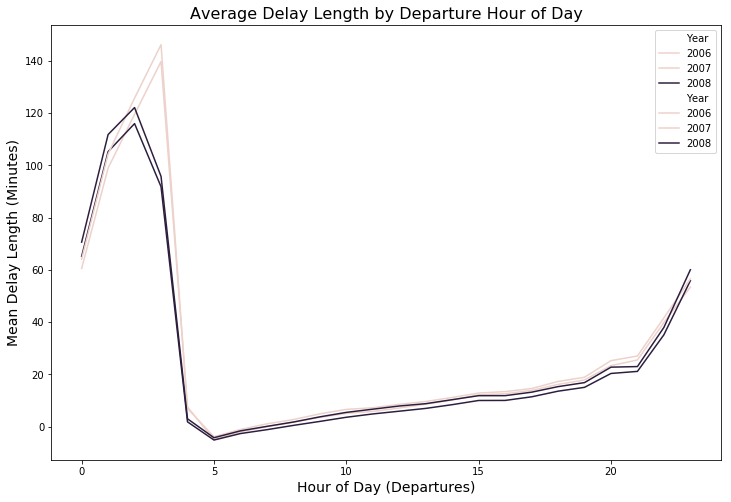

In [30]:

plt.figure(figsize=(12,8))
plt.title("Average Delay Length by Departure Hour of Day", fontsize=16)


sns.lineplot(x="dep_bucket",
            y="avg_arrival_delay",
            hue="Year",
            data=mean_delays_by_departure_hour_pd)

sns.lineplot(x="dep_bucket",
            y="avg_departure_delay",
            hue="Year",
            data=mean_delays_by_departure_hour_pd)


plt.xlabel("Hour of Day (Departures)", fontsize=14)
plt.ylabel("Mean Delay Length (Minutes)", fontsize=14)

**Note: I'm not sure sure why the plot thinks there are records with Year of 2006. I confirmed above that there are only two values for year: 2007 and 2008.**
<br>
<br>
Similar to previous plot: flights departing early in the morning were on average delayed leaving and arriving at their destination. A steady incline in average delays for both arrival and departure throughout the course of the day.